<a href="https://colab.research.google.com/github/preetamjumech/bagging-vs-random-forest/blob/main/Bagging_vs_RandomForest_27_11_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

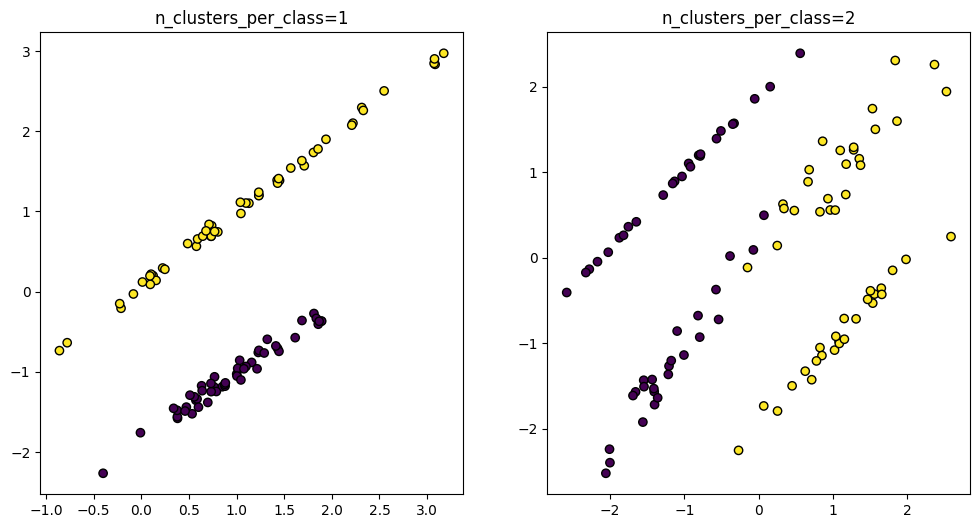

In [16]:
## For knowledge
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Create datasets with different numbers of clusters per class
X1, y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                            n_clusters_per_class=1, random_state=42)
X2, y2 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                            n_clusters_per_class=2, random_state=42)

# Plot the datasets
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(X1[:, 0], X1[:, 1], c=y1, cmap='viridis', edgecolor='k')
ax[0].set_title('n_clusters_per_class=1')
ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, cmap='viridis', edgecolor='k')
ax[1].set_title('n_clusters_per_class=2')
plt.show()

In [17]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [18]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.923516,0.066820,-1.975036,-1.453208,0.074935,1
1,-0.660549,1.295829,0.040778,2.444347,-2.173235,0
2,-1.031512,-1.842151,1.102893,-1.909673,-1.385644,1
3,2.085493,1.327269,-0.612781,-0.169507,-3.774112,1
4,-0.670910,2.095245,1.256235,2.321769,-0.898303,0


In [19]:
df["target"].value_counts()

,count
target,
1,50
0,50


In [28]:
bag = BaggingClassifier(max_features=2)

In [29]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

In [30]:
bag.estimators_[0]

DecisionTreeClassifier(random_state=108842302)

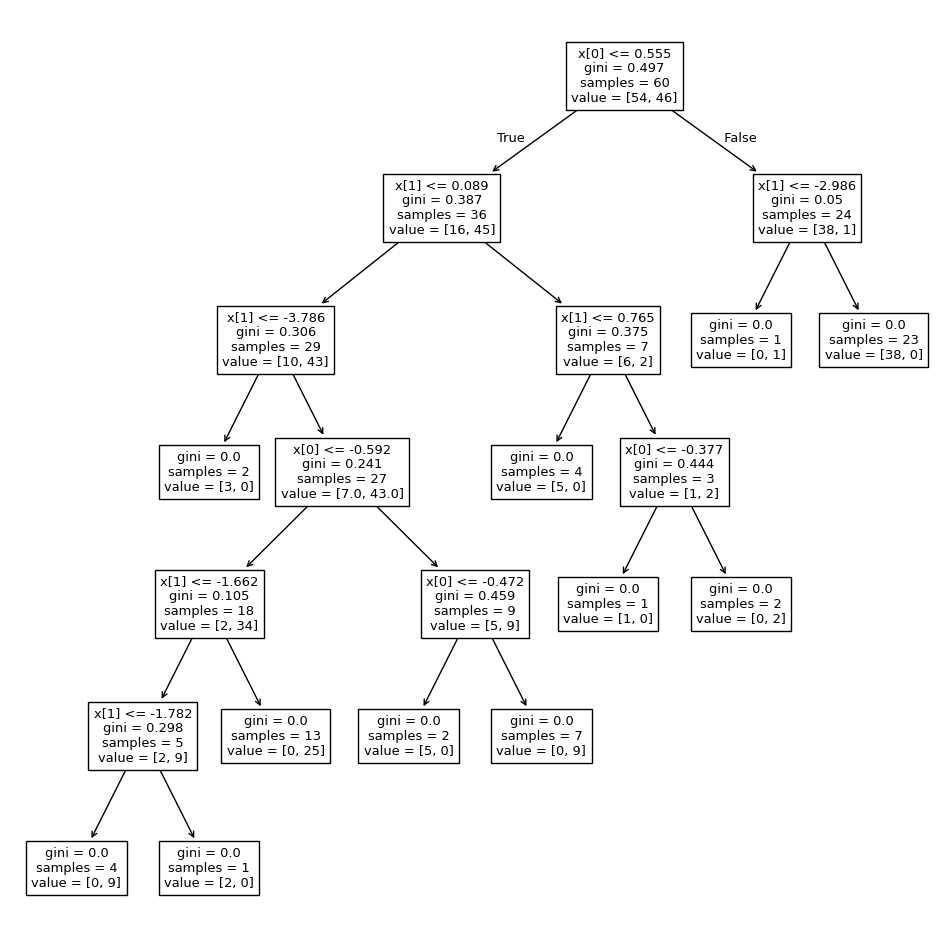

In [36]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

In [32]:
rf = RandomForestClassifier(max_features=2)

In [33]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

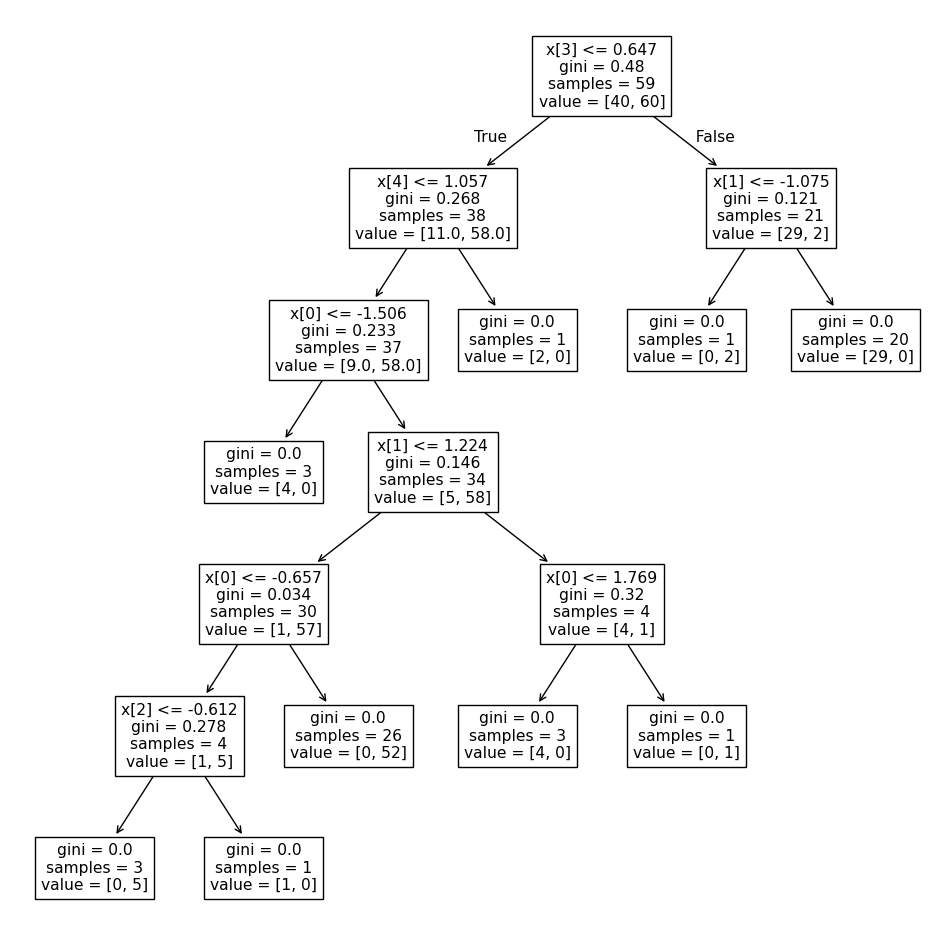

In [34]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

# So, in bagging tree level column sampling occurs, whereas in RF node level column sampling occurs